# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Sumber Dataset:
https://www.kaggle.com/datasets/michaelanietie/nigerian-house-price-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("nigeria_houses_data.csv")
df[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']] = df[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']].astype(int)
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       24326 non-null  int64 
 1   bathrooms      24326 non-null  int64 
 2   toilets        24326 non-null  int64 
 3   parking_space  24326 non-null  int64 
 4   title          24326 non-null  object
 5   town           24326 non-null  object
 6   state          24326 non-null  object
 7   price          24326 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.5+ MB


In [4]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [5]:
df.isnull().sum()

,0
bedrooms,0
bathrooms,0
toilets,0
parking_space,0
title,0
town,0
state,0
price,0


In [6]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [7]:
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

In [8]:
numeric_features = df[less].select_dtypes(include=['number']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

In [9]:
kategorical_features = df[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
  df[column] = df[column].fillna(df[column].mode()[0])

In [10]:
df = df.drop(columns=over)

In [11]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [12]:
df.isnull().sum()

,0
bedrooms,0
bathrooms,0
toilets,0
parking_space,0
title,0
town,0
state,0
price,0


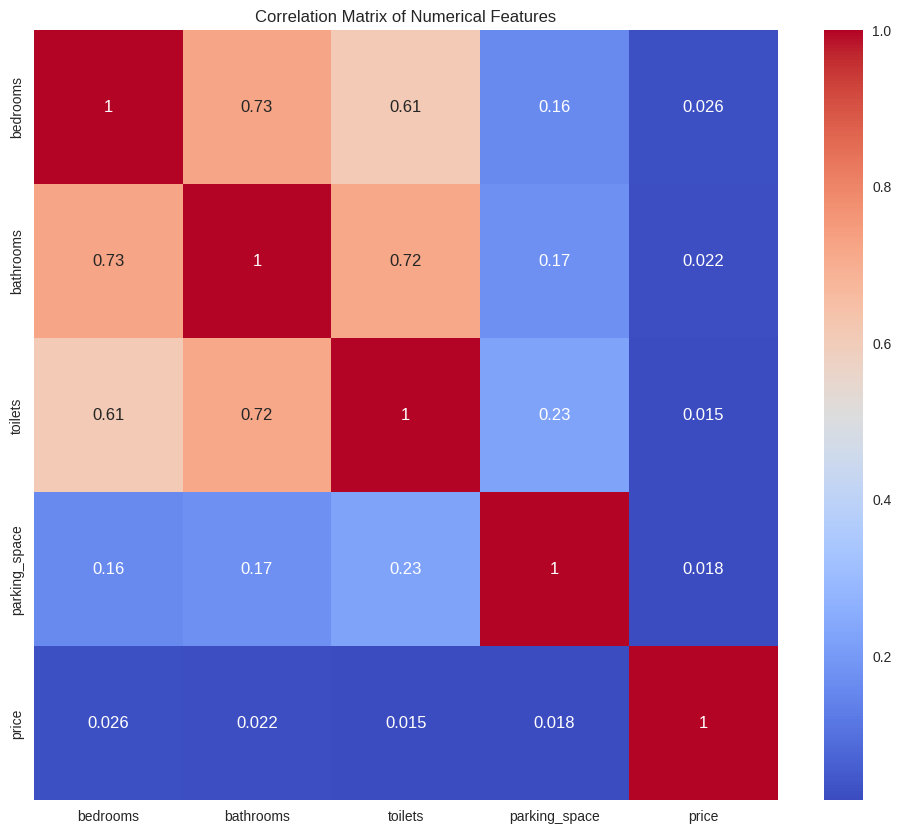

In [13]:
# Visualisasi Data
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [15]:
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

In [16]:
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
       bedrooms  bathrooms  toilets  parking_space      price  \
29            5          5        5              4  270000000   
57            5          5        6              4  105000000   
113           5          6        6              4  260000000   
227           4          5        5              4   80000000   
272           5          5        6              4  235000000   
...         ...        ...      ...            ...        ...   
24312         5          5        6              4  165000000   
24314         4          4        5              4   75000000   
24318         4          5        5              4  110000000   
24323         4          5        5              4   68000000   
24325         4          5        5              4   65000000   

                      title    town  state  
29          Detached Duplex   Lekki  Lagos  
57          Detached Duplex   Lekki  Lagos  
113         Detached Duplex   Lekki  Lagos  
227    Semi Detached Du

In [17]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,title,town,state
2,Detached Duplex,Lekki,Lagos
6,Detached Duplex,Lekki,Lagos
10,Terraced Duplexes,Lokogoma District,Abuja
11,Semi Detached Duplex,Oredo,Edo
13,Semi Detached Duplex,Lekki,Lagos
...,...,...,...
24314,Detached Duplex,Ajah,Lagos
24318,Semi Detached Duplex,Lekki,Lagos
24322,Block of Flats,Ado-Odo/Ota,Ogun
24323,Detached Duplex,Lekki,Lagos


In [18]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder

# Membuat salinan dari DataFrame asli
df_lencoder = df.copy()

# Simpan mapping untuk reverse encoding
label_mappings = {}
for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col].astype(str))
    label_mappings[col] = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [19]:
# Mengambil kolom bedrooms, bathrooms, price, title, state
X = df_lencoder.iloc[:, [0, 1, 4, 5, 7]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['bedrooms', 'bathrooms', 'price', 'title', 'state']))

       bedrooms  bathrooms      price  title  state
0             4          5  120000000      2     16
1             4          5   65000000      2     16
2             3          4   25000000      6      1
3             6          6   45000000      4      8
4             4          4   70000000      4     16
...         ...        ...        ...    ...    ...
10682         4          4   75000000      2     16
10683         4          5  110000000      4     16
10684         4          5   25000000      0     18
10685         4          5   68000000      2     16
10686         4          5   65000000      2     16

[10687 rows x 5 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

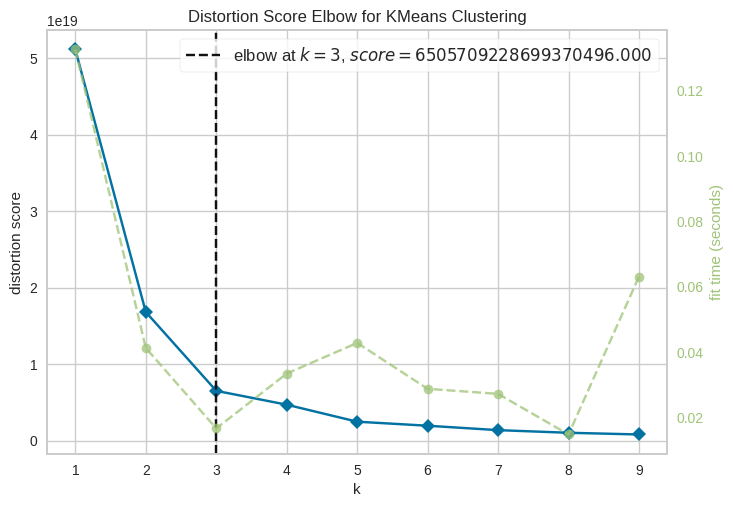

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [21]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_
df_lencoder['cluster'] = labels

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
  print("Analisis Karakteristik Setiap Cluster:")
  for cluster_id in range(k):
    # Mengambil data untuk cluster saat ini
    cluster_data = X[labels == cluster_id]

    # Menghitung rata-rata untuk setiap fitur dalam cluster

    mean_bedrooms = cluster_data[:, 0].mean() # Rata rata jumlah bedrooms
    mean_bathrooms = cluster_data[:, 1].mean() # Rata rata jumlah bathrooms
    mean_price = cluster_data[:, 2].mean() # Rata rata price
    mean_title = cluster_data[:, 3].mean() # Rata rata title
    mean_state = cluster_data[:, 4].mean() # Rata rata town

    print(f"\nCluster {cluster_id + 1}:")
    print(f"bedrooms: {mean_bedrooms:.2f}")
    print(f"bathrooms: {mean_bathrooms:.2f}")
    print(f"price: {mean_price:.2f}")
    print(f"title: {mean_title:.2f}")
    print(f"state: {mean_state:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
bedrooms: 4.07
bathrooms: 4.46
price: 58661214.57
title: 2.78
state: 13.76

Cluster 2:
bedrooms: 4.71
bathrooms: 4.89
price: 252866193.58
title: 2.38
state: 14.30

Cluster 3:
bedrooms: 4.72
bathrooms: 4.91
price: 136258784.10
title: 2.52
state: 14.34


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Untuk n_clusters = 2, silhouette score adalah 0.6155762923671981
Untuk n_clusters = 3, silhouette score adalah 0.6258759605866486
Untuk n_clusters = 4, silhouette score adalah 0.5263844098591479
Untuk n_clusters = 5, silhouette score adalah 0.5768504808510144
Untuk n_clusters = 6, silhouette score adalah 0.5448732384462058


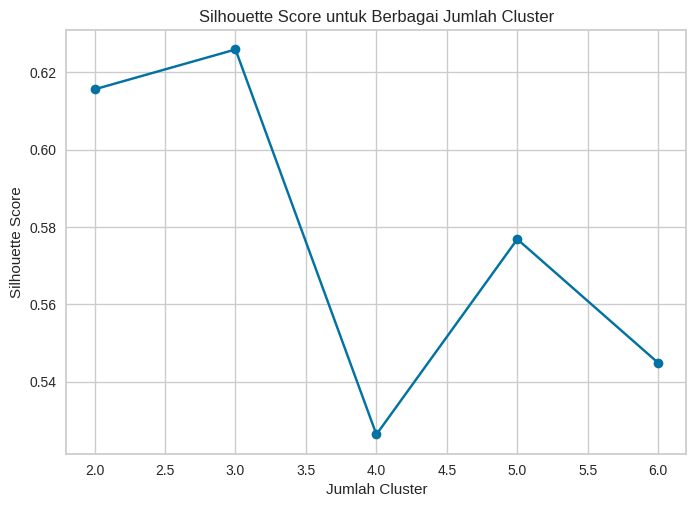

In [22]:
range_n_clusters = [2, 3, 4, 5, 6]

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {n_clusters}, silhouette score adalah {silhouette_avg}")

# Plot Silhouette Score
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Berbagai Jumlah Cluster")
plt.show()

In [23]:
best_silhouette_score = max(silhouette_scores)
best_n_clusters = range_n_clusters[silhouette_scores.index(best_silhouette_score)]

print(f"The best silhouette score is {best_silhouette_score} with {best_n_clusters} clusters.")

kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

analyze_clusters(X, labels, best_n_clusters)

The best silhouette score is 0.6258759605866486 with 3 clusters.
Analisis Karakteristik Setiap Cluster:

Cluster 1:
bedrooms: 4.07
bathrooms: 4.46
price: 58661214.57
title: 2.78
state: 13.76

Cluster 2:
bedrooms: 4.71
bathrooms: 4.89
price: 252866193.58
title: 2.38
state: 14.30

Cluster 3:
bedrooms: 4.72
bathrooms: 4.91
price: 136258784.10
title: 2.52
state: 14.34


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [24]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

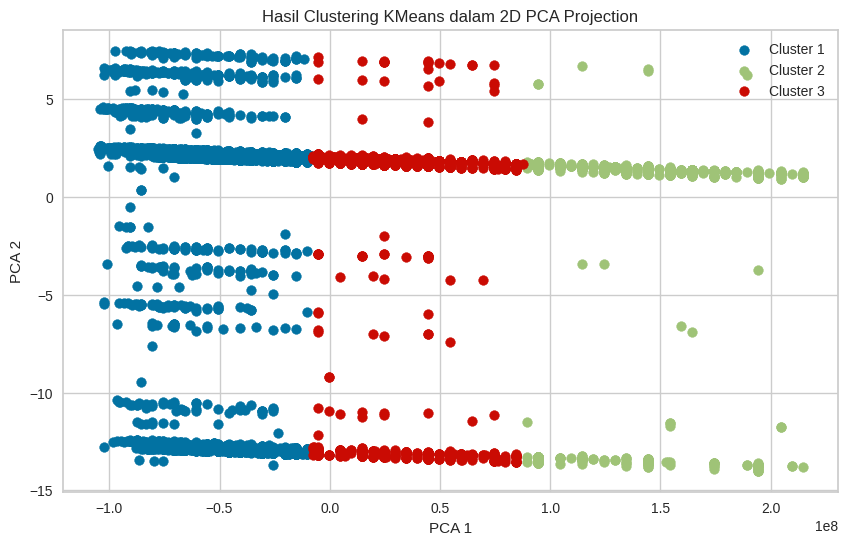

In [25]:
# Menggunakan PCA untuk reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil clustering dalam 2D PCA projection
def plot_pca_clusters(X_pca, labels, k):
    plt.figure(figsize=(10, 6))

    # Plot setiap cluster dengan warna yang berbeda
    for cluster_id in range(k):
        cluster_data = X_pca[labels == cluster_id]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id + 1}')

    # Tambahkan label dan judul
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Hasil Clustering KMeans dalam 2D PCA Projection')
    plt.legend()
    plt.show()

# Panggil fungsi untuk plot PCA 2D
plot_pca_clusters(X_pca, labels, k)

## **e. Analisis dan Interpretasi Hasil Cluster**


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah rekomendasi tahapannya.

1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [26]:
# Reverse encoding untuk interpretasi agar tau dimana lokasi dan tipe rumah
df_lencoder['title'] = df_lencoder['title'].map(label_mappings['title'])
df_lencoder['state'] = df_lencoder['state'].map(label_mappings['state'])

# Fungsi untuk analisis dan interpretasi karakteristik cluster
def analyze_and_interpret_clusters(df, k, features):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = df[df['cluster'] == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")

        for feature in features:
            if feature in category_features:
                value = cluster_data[feature].mode()[0]
            else:
                value = int(cluster_data[feature].mean())
            print(f"  - {feature}: {value}")

# Menampilkan DataFrame yang telah di-reverse encode dengan cluster
print(df_lencoder[['bedrooms', 'bathrooms', 'price', 'title', 'state', 'cluster']])

# Analisis karakteristik setiap cluster dengan nama kategori asli
analyze_and_interpret_clusters(df_lencoder, best_n_clusters, ['bedrooms', 'bathrooms', 'price', 'title', 'state'])


       bedrooms  bathrooms      price                 title  state  cluster
2             4          5  120000000       Detached Duplex  Lagos        2
6             4          5   65000000       Detached Duplex  Lagos        0
10            3          4   25000000     Terraced Duplexes  Abuja        0
11            6          6   45000000  Semi Detached Duplex    Edo        0
13            4          4   70000000  Semi Detached Duplex  Lagos        0
...         ...        ...        ...                   ...    ...      ...
24314         4          4   75000000       Detached Duplex  Lagos        0
24318         4          5  110000000  Semi Detached Duplex  Lagos        2
24322         4          5   25000000        Block of Flats   Ogun        0
24323         4          5   68000000       Detached Duplex  Lagos        0
24325         4          5   65000000       Detached Duplex  Lagos        0

[10687 rows x 6 columns]
Analisis Karakteristik Setiap Cluster:

Cluster 1:
  - bedroom

Tulis hasil interpretasinya di sini.
1. Cluster 1 Karakteristik:

*   Bedrooms: 4
*   Bathrooms: 4
*   Price: Dengan rata rata harga 58.661.214 Nigerian Naira
*   Title: Detached Duplex
*   State: Lagos

Cluster ini merepresentasikan properti dengan harga menengah yang umumnya adalah Detached Duplex berlokasi di Lagos. Properti dalam cluster ini cocok untuk keluarga yang mencari hunian nyaman dengan fasilitas cukup dan harga yang terjangkau. Properti dalam cluster ini menawarkan keseimbangan antara kenyamanan dan keterjangkauan, menjadikannya pilihan yang populer di pasar menengah.

2. Cluster 2 Karakteristik:
*   Bedrooms: 4
*   Bathrooms: 4
*   Price: Dengan rata rata harga 252.866.193 Nigerian Naira
*   Title: Detached Duplex
*   State: Lagos

Cluster ini merepresentasikan properti mewah dengan harga tinggi yang umumnya adalah Detached Duplex berlokasi di Lagos. Properti dalam cluster ini sangat diminati oleh pembeli yang mencari hunian mewah dengan fasilitas lengkap. Mereka menawarkan eksklusivitas, kenyamanan, dan fasilitas premium yang menjadikan cluster ini target utama untuk pasar properti mewah.

3. Cluster 3 Karakteristik:

*   Bedrooms: 4
*   Bathrooms: 4
*   Price: Dengan rata rata harga 136.258.784 Nigerian Naira
*   Title: Detached Duplex
*   State: Lagos

Cluster ini merepresentasikan properti dengan harga menengah ke atas yang umumnya adalah Detached Duplex berlokasi di Lagos. Properti dalam cluster ini menawarkan keseimbangan antara kemewahan dan keterjangkauan, cocok untuk keluarga yang menginginkan fasilitas premium tanpa biaya yang sangat tinggi. Properti ini menjembatani celah antara pasar properti menengah dan mewah, menyediakan opsi yang lebih terjangkau dengan fasilitas yang hampir sama dengan properti mewah.


**Kesimpulan:**

Dengan menggunakan fitur fitur meliputi bedrooms, bathrooms, price, title, dan state untuk memahami distribusi dan karakteristik properti di Nigeria. Dapat ditarik kesimpulan yaitu

Cluster 1: Properti dengan harga menengah di Lagos, umumnya Detached Duplex, dengan harga rata-rata 58.661.214 ₦. Cocok untuk keluarga yang mencari hunian nyaman dan terjangkau.

Cluster 2: Properti mewah dengan harga sangat tinggi di Lagos, umumnya Detached Duplex, dengan harga rata-rata 252.866.193 ₦. Sangat diminati oleh pembeli yang mencari hunian mewah dengan fasilitas lengkap.

Cluster 3: Properti dengan harga menengah ke atas di Lagos, umumnya Detached Duplex, dengan harga rata-rata 136.258.784 ₦. Menawarkan keseimbangan antara kemewahan dan keterjangkauan.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [29]:
# Encode kembali fitur kategorikal ke numerik untuk tahap klasifikasi selanjutnya
label_encoder_title = LabelEncoder()
label_encoder_state = LabelEncoder()
df_lencoder['title'] = label_encoder_title.fit_transform(df_lencoder['title'])
df_lencoder['state'] = label_encoder_state.fit_transform(df_lencoder['state'])

from google.colab import files
df_lencoder.to_csv('clustered_nigeria_houses_data.csv', encoding = 'utf-8-sig')
files.download('clustered_nigeria_houses_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>